**Random Sample Imputation**


Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samishiraz00","key":"46891157b5e279e456473375fee471b9"}'}

In [3]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 48.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.23MB/s]


In [8]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("/content/train.csv", usecols=["Survived", "Age", "Fare"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
## percentage of null values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df['Age'].isnull().sum()

177

In [17]:
df['Age'].dropna().sample()

412    33.0
Name: Age, dtype: float64

In [19]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
median = df['Age'].median()
median

28.0

In [45]:
def impute_nan(df,variable,median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] = df[variable]
  # It will will nan value by random values
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  random_sample.index =df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [46]:
impute_nan(df, 'Age', median)

In [47]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


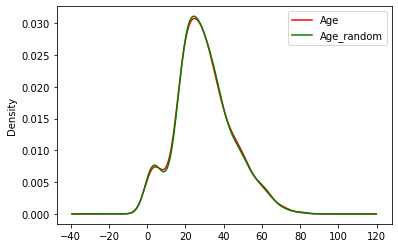

In [51]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax, color='red') 
df.Age_random.plot(kind='kde', ax=ax, color="green")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [56]:
print(df['Age'].std())
print(df['Age_random'].std())

14.526497332334044
14.5636540895687


**Advantages:**
1) Easy To implement
2) There is less distortion in variance

**Disadvantage:**

1) Every situation randomness wont work

**Capturing NAN values with a new feature:**

It works well if the data are not missing completely at random

In [58]:
df=pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
import numpy as np
df['NAN_values'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,NAN_values
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


**Advantages**
Easy to implement
Captures the importance of missing values

**Disadvantages**
Creating Additional Features(Curse of Dimensionality)

In [62]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.head(10)

,Survived,Age,Fare,NAN_values
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0
